In [1]:
!pip install tensorflow==2.13.0 opencv-python matplotlib

In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
# Model(inputs=[inputimage, verificationimage], outputs=[1,0])

from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
# Layer--> class L1Dist(Layer), Conv2D-->convolutional network, Dense--> networks the layers (in paper), MaxPooling2D--> Srinks the network info., Input--> Input(shape=), Flatten-->takes info. from previous layer and flattens the info. into single dimension.

import tensorflow as tf
# For image processing

In [4]:
# Avoid out of memory by setting GPU memory consuption Growth
gpus = tf.config.experimental.list_physical_devices('GPU') # This line is getting all the diff. gpus available on our machine. 
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
len(gpus)

0

In [6]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [7]:
POS_PATH

'data\\positive'

In [8]:
# Make the directories 
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [9]:
# Move LFW Images to the following repository Face/negative
for directory in os.listdir('lfw'):
  for file in os.listdir(os.path.join('lfw', directory)):
    EX_PATH = os.path.join('lfw', directory, file)
    NEW_PATH = os.path.join(NEG_PATH, file)
    os.replace(EX_PATH, NEW_PATH)

In [10]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [11]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        print(os.path.join('lfw', directory, file))
        print(os.path.join(NEG_PATH, file))

In [12]:
# Import uuid library to generate unique image names (universally unique identifiers)
import uuid

In [13]:
uuid.uuid1()

UUID('a1a06db1-63af-11ee-b7b8-b7e5cb8d671f')

In [15]:
# Establish a conection to the webcam (first line)
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read() # frame is the actual image

  # Cut down frame to 250x250px
  frame = frame[120:120+250,200:200+250, :]

  # Collect anchors
  if cv2.waitKey(1) & 0XFF == ord('a'):
    # Created the unique file path
    imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
    # Write out anchor image
    cv2.imwrite(imgname, frame)
    
  # Collect positives
  if cv2.waitKey(1) & 0XFF == ord('p'):
    # Created the unique file path
    imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
    # Write out positive image
    cv2.imwrite(imgname, frame)
        
  # Show image back to screenq
  cv2.imshow('Image Collection', frame)

  # Breaking gracefully
  if cv2.waitKey(1) & 0XFF == ord('q'): # waitkey waits for millisec.(cv2.waitKey??)
       break

# Release the webcam
cap.release()
# CLose the image show frame
cv2.destroyAllWindows()

In [16]:
'{}.jpg'.format(uuid.uuid1())

'dfee57d0-63b0-11ee-81d9-b7e5cb8d671f.jpg'

In [17]:
frame

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 72,  74,  79],
        [ 73,  73,  80],
        [ 74,  73,  81]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 65,  68,  72],
        [ 70,  71,  78],
        [ 71,  71,  80]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 55,  61,  66],
        [ 56,  63,  71],
        [ 61,  66,  76]],

       ...,

       [[180, 187, 186],
        [183, 190, 190],
        [181, 188, 187],
        ...,
        [ 88,  87, 127],
        [ 73,  74, 115],
        [ 69,  72, 113]],

       [[185, 191, 191],
        [185, 191, 191],
        [181, 188, 187],
        ...,
        [ 87,  85, 127],
        [ 80,  78, 121],
        [ 71,  71, 114]],

       [[187, 194, 193],
        [185, 191, 191],
        [185, 191, 191],
        ...,
        [ 88,  86, 129],
        [ 85,  83, 126],
        [ 71,  71, 113]]

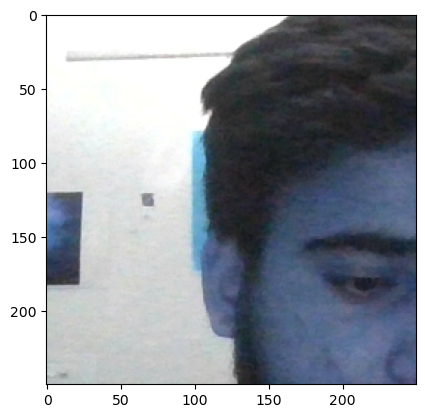

In [18]:
plt.imshow(frame)

In [19]:
frame.shape

(250, 250, 3)

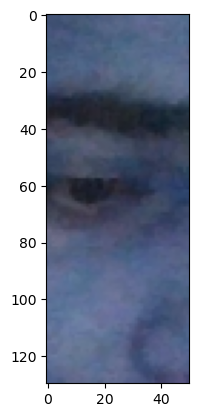

In [20]:
plt.imshow(frame[120:120+250,200:200+250, :]);

In [21]:
def data_aug(img):
    data = []
    for i in range(2):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100), np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100), np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9, upper=1, seed=(np.random.randint(100), np.random.randint(100)))
        
        data.append(img)
        
    return data

In [22]:
import os
import uuid

In [25]:
img_path = os.path.join(ANC_PATH, '2cea2536-63b0-11ee-8b53-b7e5cb8d671f.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [27]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [28]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(3000)

In [29]:
dir_test = anchor.as_numpy_iterator()

In [30]:
print(dir_test.next())

b'data\\anchor\\192d4d88-63b0-11ee-91ad-b7e5cb8d671f.jpg'


In [31]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps- resizing the image to the 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img/255.0
    return img

In [32]:
# Returning numpy of the image
preprocess('data\\anchor\\3e5a819e-60fc-11ee-aa6b-b7e5cb8d671f.jpg')

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.7176471 , 0.72156864, 0.7019608 ],
        [0.7286765 , 0.73259807, 0.70906866],
        [0.7223039 , 0.7262255 , 0.7026961 ],
        ...,
        [0.98063725, 0.9963235 , 1.        ],
        [0.9909314 , 1.        , 0.9977941 ],
        [0.99607843, 1.        , 1.        ]],

       [[0.70980394, 0.7137255 , 0.69411767],
        [0.71568626, 0.71960783, 0.6992647 ],
        [0.7254902 , 0.7294118 , 0.70686275],
        ...,
        [0.98063725, 0.9963235 , 0.9968137 ],
        [0.99019605, 1.        , 0.99607843],
        [0.99607843, 1.        , 1.        ]],

       [[0.71666664, 0.7205882 , 0.70098037],
        [0.717402  , 0.7205882 , 0.7031863 ],
        [0.7272059 , 0.72818625, 0.717402  ],
        ...,
        [0.9857843 , 1.        , 0.99607843],
        [0.9938725 , 1.        , 0.99828434],
        [0.99607843, 1.        , 1.        ]],

       ...,

       [[0.57230395, 0.57230395, 0.57230395],
        [0.57

In [33]:
img = preprocess('data\\anchor\\3e5a819e-60fc-11ee-aa6b-b7e5cb8d671f.jpg')

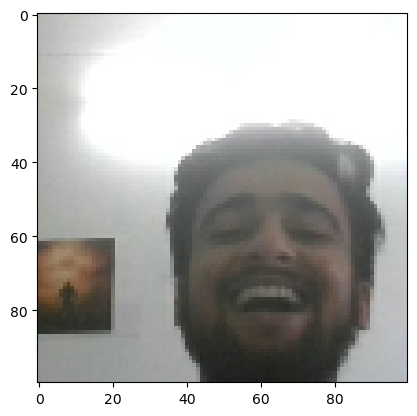

In [34]:
plt.imshow(img)

In [35]:
img.numpy().min()

0.10318627

In [36]:
img.numpy().max()

1.0

In [37]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [38]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [39]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))) # with label of one
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives) # Joining both (+,-) datasets
# zip - zipping together so that we can iterate at the same time and creating different datasets for both the cases.

In [40]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [41]:
# tf.ones(len(anchor))
tf.zeros(len(anchor))

<tf.Tensor: shape=(3000,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [42]:
samples = data.as_numpy_iterator()

In [43]:
# 1 sample from our data
example = samples.next()

In [44]:
example

(b'data\\anchor\\44567b33-60fc-11ee-8965-b7e5cb8d671f.jpg',
 b'data\\positive\\23b33ce0-63b1-11ee-a03b-b7e5cb8d671f.jpg',
 1.0)

In [45]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [46]:
res = preprocess_twin(*example)

In [47]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.7012255 , 0.7051471 , 0.6855392 ],
        [0.71666664, 0.7205882 , 0.7       ],
        [0.7269608 , 0.73088235, 0.70735294],
        ...,
        [0.9843137 , 1.        , 0.99607843],
        [0.9843137 , 1.        , 0.99607843],
        [0.98039216, 0.99607843, 0.99215686]],

       [[0.71568626, 0.71960783, 0.7       ],
        [0.71862745, 0.722549  , 0.7019608 ],
        [0.7254902 , 0.7294118 , 0.7058824 ],
        ...,
        [0.9843137 , 1.        , 0.9970588 ],
        [0.9843137 , 1.        , 0.9970588 ],
        [0.9843137 , 1.        , 0.9970588 ]],

       [[0.71666664, 0.7205882 , 0.69803923],
        [0.722549  , 0.7264706 , 0.70367646],
        [0.72843134, 0.7323529 , 0.7088235 ],
        ...,
        [0.9843137 , 1.        , 0.9970588 ],
        [0.9843137 , 1.        , 0.9970588 ],
        [0.9843137 , 1.        , 0.9970588 ]],

       ...,

       [[0.5715686 , 0.57941175, 0.5617647 ],
        [0.57

In [48]:
len(res)

3

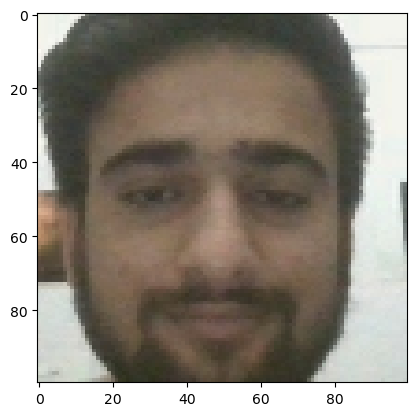

In [49]:
plt.imshow(res[1])

In [50]:
res[1]


<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.9558824 , 0.9637255 , 0.92058825],
        [0.9529412 , 0.95686275, 0.9254902 ],
        [0.9490196 , 0.9529412 , 0.92156863],
        ...,
        [0.9529412 , 0.95686275, 0.93333334],
        [0.9529412 , 0.95686275, 0.93333334],
        [0.9529412 , 0.95686275, 0.93333334]],

       [[0.9558824 , 0.9637255 , 0.92058825],
        [0.9529412 , 0.95686275, 0.9254902 ],
        [0.9490196 , 0.9529412 , 0.92156863],
        ...,
        [0.9529412 , 0.95686275, 0.93333334],
        [0.9529412 , 0.95686275, 0.93333334],
        [0.9529412 , 0.95686275, 0.93333334]],

       [[0.9558824 , 0.9637255 , 0.92058825],
        [0.9529412 , 0.95686275, 0.9254902 ],
        [0.9490196 , 0.9529412 , 0.92156863],
        ...,
        [0.9529412 , 0.95686275, 0.93333334],
        [0.9529412 , 0.95686275, 0.93333334],
        [0.9529412 , 0.95686275, 0.93333334]],

       ...,

       [[0.8220588 , 0.8455882 , 0.8063725 ],
        [0.82

In [51]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [52]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [53]:
samples = data.as_numpy_iterator()

In [56]:
samples.next()

(array([[[0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         ...,
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ]],
 
        [[0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         ...,
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ]],
 
        [[0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         ...,
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ],
         [0.9764706 , 0.9764706 , 0.9764706 ]],
 
        ...,
 
        [[0.8245098 , 0.8656863 , 0.8509804 ],
         [0.8264706 , 0.86764705, 0.85294

In [57]:
len(samples.next())

3

In [58]:
samp = samples.next()

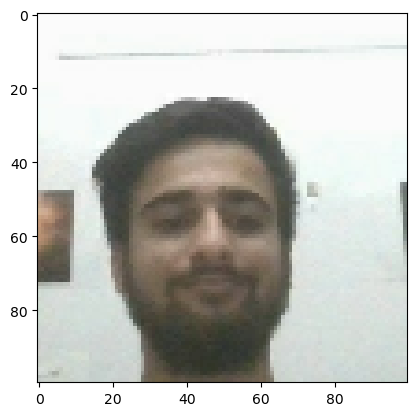

In [59]:
plt.imshow(samp[0])

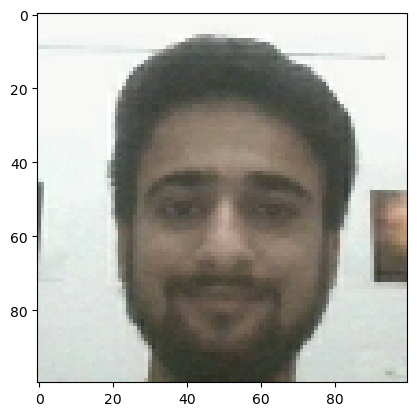

In [60]:
plt.imshow(samp[1])
# samp[0] for anchor img.,samp[1]for + or - img, samp[2] for label 1 or 0.

In [61]:
samp[2]

1.0

In [62]:
round(len(data)*.7)

4200

In [63]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16) # Passing our data in batches of 16.
train_data = train_data.prefetch(8)

In [64]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [65]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [66]:
train_samples = train_data.as_numpy_iterator()

In [67]:
train_sample = train_samples.next()

In [68]:
train_sample

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.85245097, 0.8720588 , 0.8492647 ],
          [0.86029

In [69]:
len(train_sample[0]) # A batch of 16.(We have 16 images in one sample)

16

In [70]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [71]:
round(len(data)*.3)

1800

In [72]:
inp = Input(shape=(100,100,3), name='input_image')

In [73]:
c1 = Conv2D(64,(10,10), activation='relu')(inp)

In [74]:
c1

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d')>

In [75]:
 m1 = MaxPooling2D(64,(2,2), padding='same')(c1)

In [76]:
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [77]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [78]:
c2

<KerasTensor: shape=(None, 40, 40, 128) dtype=float32 (created by layer 'conv2d_1')>

In [79]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [80]:
m3

<KerasTensor: shape=(None, 9, 9, 128) dtype=float32 (created by layer 'max_pooling2d_2')>

In [81]:
c3

<KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'conv2d_2')>

In [82]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4) # Flattening into single dimension 
d1 = Dense(4096, activation='sigmoid')(f1)

In [83]:
c4

<KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_3')>

In [84]:
6*6*256

9216

In [85]:
f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [86]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [87]:
mod

In [88]:
def make_embedding():
    # Input Layer
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64,(10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2), padding='same')(c1) # Condensing the data
    
    # Second Block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third Block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # FinAL Embedding Layer
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4) # Flattening into single dimension 
    d1 = Dense(4096, activation='sigmoid')(f1) # 4096 feature vector(input) will give some output value.
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [89]:
embedding = make_embedding()

In [90]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [91]:
# Creating a new class for our custom layer (Layer class)
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method- inheritance
    def __init__(self, **kwargs):
        super().__init__()
        
    # call fun. helps What to do when some data is passed through it.  
    # Similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding) 

In [92]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [93]:
inp_embedding= embedding(input_image)
val_embedding= embedding(validation_image)

In [94]:
inp_embedding
val_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [95]:
siamese_layer = L1Dist()

In [96]:
distances = siamese_layer(inp_embedding, val_embedding)

In [97]:
classifier = Dense(1, activation='sigmoid')(distances)

In [98]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [99]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [100]:
siamese_network

In [101]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [102]:
def make_siamese_model():
    
    # Handle inputs (Anchor image input in the network)
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification Layer (connecting the distances into one layer)
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [103]:
siamese_model = make_siamese_model()

In [104]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [105]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [106]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001 Learning rate

In [107]:
checkpoint_dir = './training_checkpoints' # directory to save our checkpoints
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model = siamese_model)

In [108]:
test_batch = train_data.as_numpy_iterator()

In [109]:
batch_1 = test_batch.next()

In [110]:
len(batch_1[0]) # We have 16 anchor images in the first batch

16

In [111]:
len(batch_1[1]) # We have 16 + and - images in the first batch

16

In [112]:
batch_1[2] # Labels of our batch

array([1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.],
      dtype=float32)

In [113]:
X = batch_1[:2]

In [114]:
np.array(X).shape 

(2, 16, 100, 100, 3)

Each batch in the dataset is comprised of 16 samples, each of which contains 
an anchor image, a + or - image and a label.

In [115]:
# Label
y = batch_1[2]
y

array([1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.],
      dtype=float32)

In [116]:
tf.losses.BinaryCrossentropy??

In [117]:
@tf.function
def train_step(batch):
    
    # Record all our operations
    with tf.GradientTape() as tape:
        # Get anchor and +/- image
        X = batch[:2]
        # Get Label
        y = batch[2]
        
        # Forward Pass (passing first batch in model)
        yhat = siamese_model(X, training=True)
        # Calculate Loss
        loss = binary_cross_loss(y, yhat) # y-> true value, yhat-> pred. value
    print (loss)
        
    # Calculate gradients -> recorded all our operations with different weights (tape)
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    # The optimizer here is calculating and propagating the new weights using Adam's optimisation algorithm, a variant of gradient descent.
   
    return loss
    pass

In [118]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [119]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data)) # Progress bar
        
        # Creating a metric object
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here 
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
            
        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [120]:
EPOCHS = 2

In [121]:
train(train_data, EPOCHS)


 Epoch 1/2
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
1/1 [==============================] - 1s 1s/step4:


263/263 [==============================] - 4820s 18s/step
0.040335156 0.88662237 0.97904664

 Epoch 2/2
1/1 [==============================] - 1s 1s/step:08:


1/1 [==============================] - 1s 1s/step0:


263/263 [==============================] - 4720s 18s/step
0.0077915275 0.9660057 0.990799


In [122]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [123]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [124]:
test_input

array([[[[0.9490196 , 0.94509804, 0.92941177],
         [0.9490196 , 0.94509804, 0.92941177],
         [0.9490196 , 0.94509804, 0.92941177],
         ...,
         [0.22352941, 0.23039216, 0.19019608],
         [0.2129902 , 0.21691176, 0.19142157],
         [0.2245098 , 0.22843137, 0.20490196]],

        [[0.9490196 , 0.94509804, 0.92941177],
         [0.9490196 , 0.94509804, 0.92941177],
         [0.9490196 , 0.94509804, 0.92941177],
         ...,
         [0.1992647 , 0.20906863, 0.16887255],
         [0.21446079, 0.21838236, 0.19289216],
         [0.21764706, 0.22156863, 0.19803922]],

        [[0.9490196 , 0.94509804, 0.92941177],
         [0.9490196 , 0.94509804, 0.92941177],
         [0.9490196 , 0.94509804, 0.92941177],
         ...,
         [0.21397059, 0.22156863, 0.18137255],
         [0.21715686, 0.22107843, 0.19558823],
         [0.21960784, 0.22352941, 0.2       ]],

        ...,

        [[0.81911767, 0.8426471 , 0.8269608 ],
         [0.8115196 , 0.83480394, 0.81911767]

In [125]:
test_val

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

In [126]:
y_true

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [127]:
test_data.as_numpy_iterator()

In [128]:
test_var = test_data.as_numpy_iterator().next() # Going to batches next by next(to grab a batch of data)

In [129]:
len(test_var)

3

In [130]:
test_var[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.91813725, 0.91813725, 0.9102941 ],
         [0.9362745 , 0.94411767, 0.93235296]

In [131]:
len(test_var[0])

16

In [132]:
test_var[1]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.7637255 , 0.8       , 0.76960784],
         [0.79289216, 0.82916665, 0.7985294 ]

In [133]:
len(test_var[1])

16

In [134]:
test_var[2]

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
      dtype=float32)

In [135]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 2s 2s/step


array([[3.53589130e-05],
       [9.92364883e-01],
       [9.97570872e-01],
       [9.99991000e-01],
       [2.95946065e-05],
       [1.95798813e-04],
       [1.10218454e-04],
       [2.68993813e-06],
       [4.33291547e-07],
       [1.77994025e-05],
       [2.18321907e-06],
       [2.16087557e-07],
       [1.19520519e-05],
       [1.97900272e-06],
       [1.94131688e-03],
       [9.79782522e-01]], dtype=float32)

In [136]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat] # List comprehension
# or 
# res[]
# for prediction in y_hat:
#     if prediciton > 0.5:
#         res.append(1)
#     else:
#         res.append(0)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [137]:
y_true

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [138]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall result
m.result().numpy()

1.0

In [139]:
# Creating a metric object
m = Precision()

# Calculating the precision value
m.update_state(y_true, y_hat)

# Return Recall result
m.result().numpy()

1.0

In [140]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true, yhat)
    
print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 1s 1s/step
0.9517685 0.99887514


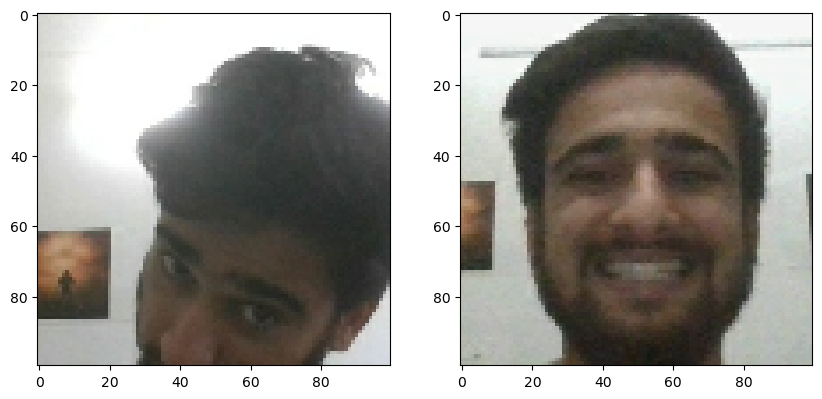

In [141]:
# Set plot size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

plt.show()

In [142]:
# save weights
siamese_model.save('siamesemodelv3.h5')

C:\Users\ACER\Desktop\sample_project_1\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [143]:
# Reload model
model = tf.keras.models.load_model('siamesemodelv3.h5', 
                                   custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [144]:
# Making predicitons with reloaded model
model.predict([test_input, test_val])

1/1 [==============================] - 1s 1s/step


array([[9.9843079e-01],
       [2.4963659e-04],
       [4.5916386e-04],
       [9.9708706e-01],
       [9.9848086e-01],
       [1.6312656e-06],
       [9.6382892e-01],
       [7.4472437e-06]], dtype=float32)

In [145]:
# Viewing model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [146]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
        
    # Detection threshold: Metric above which a predicition is considered positive
    detection = np.sum(np.array(results) > detection_threshold)
    # Verification threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold

    return results, verified

In [157]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250, 200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
            # Save input image to application_data/input_image folder
            cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
            # Run Verification
            results, verified = verify(model, 0.5, 0.7) #(frame, model, detection_threshold, verification_threshold)
            print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [158]:
results

[array([[0.93971115]], dtype=float32),
 array([[0.99260783]], dtype=float32),
 array([[0.99812526]], dtype=float32),
 array([[0.9900762]], dtype=float32),
 array([[0.98259914]], dtype=float32),
 array([[0.8336]], dtype=float32),
 array([[0.99691427]], dtype=float32),
 array([[0.98175347]], dtype=float32),
 array([[0.99693686]], dtype=float32),
 array([[0.77824795]], dtype=float32),
 array([[0.9415785]], dtype=float32),
 array([[0.98017126]], dtype=float32),
 array([[0.96797425]], dtype=float32),
 array([[0.9861475]], dtype=float32),
 array([[0.99725807]], dtype=float32),
 array([[0.84942704]], dtype=float32),
 array([[0.99550635]], dtype=float32),
 array([[0.9851209]], dtype=float32),
 array([[0.9963529]], dtype=float32),
 array([[0.9901376]], dtype=float32),
 array([[0.6828308]], dtype=float32),
 array([[0.93325096]], dtype=float32),
 array([[0.65405875]], dtype=float32),
 array([[0.89294314]], dtype=float32),
 array([[0.7513506]], dtype=float32),
 array([[0.99661946]], dtype=float32)

In [159]:
np.sum(np.array(results)>0.5)

143

In [160]:
np.squeeze(results) > 0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [161]:
np.sum(np.squeeze(results) > 0.5)

143

In [162]:
143/150

0.9533333333333334